**Task2: to explore supervised ML**

regression task to predict the percentage of marks that a student is expected to score

In [222]:
import numpy as np
import pandas as pd
#reading data
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [223]:
#preparing data
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values  

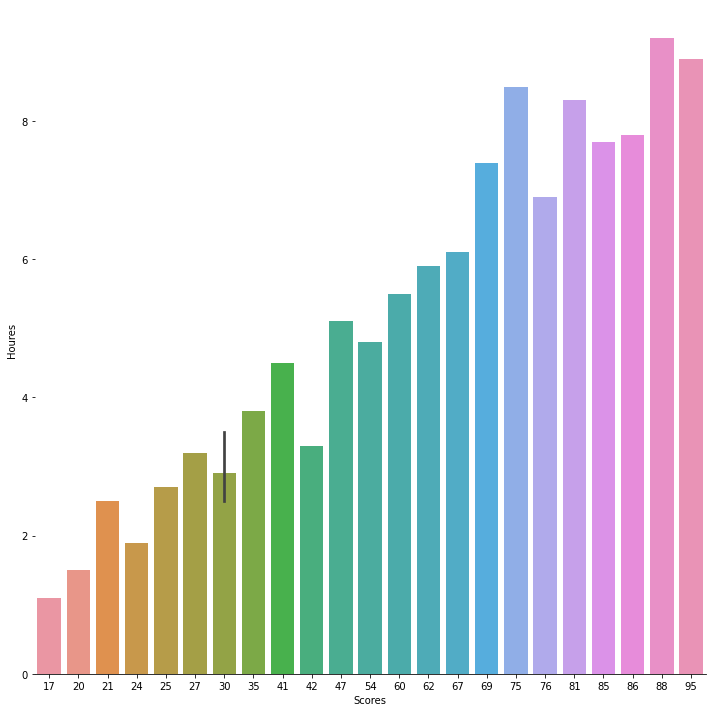

In [224]:
#figuring out our data
import seaborn as sns
dataplot = sns.catplot( data=data, kind="bar", x="Scores", y="Hours", alpha=1, height=10)
dataplot.despine(left=True)
dataplot.set_axis_labels("Scores", "Houres")

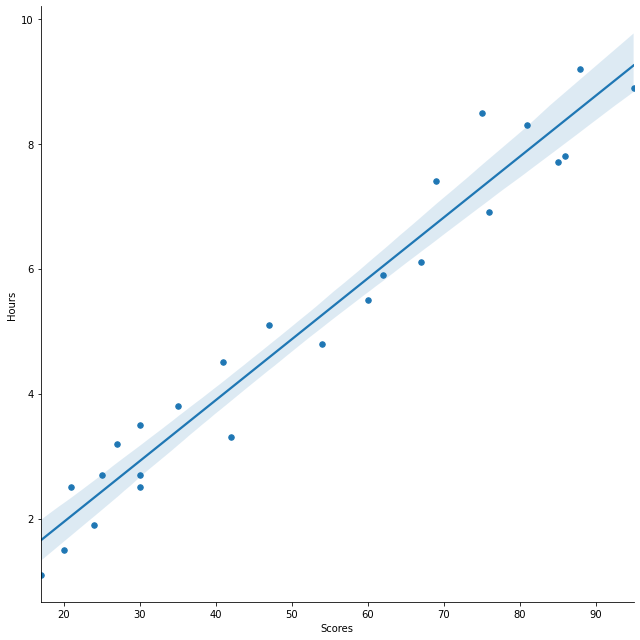

In [225]:
sns.lmplot(x="Scores", y="Hours", data=data, height=9, scatter_kws={"s": 30, "alpha": 1})

we have a positive linear relation between the number of hours studied and percentage of score.

In [226]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
prediction = regressor.predict(X_test) 

In [227]:
#################
errors= []
def error(y1,y2):
  error=y1-y2
  if error>0: return error
  else: 
    return -error
#################
x=len(y_test)
for i in range(x):
  e=error(prediction[i],y_test[i])
  errors.append(e)
#################
df = pd.DataFrame({'True y': y_test, 'Prediction': prediction , 'error':errors})  
df.head()

,True y,Prediction,error
0,81,83.188141,2.188141
1,30,27.032088,2.967912
2,21,27.032088,6.032088
3,76,69.633232,6.366768
4,62,59.951153,2.048847


What will be predicted score if a student study for 9.25 hrs in a day?

In [230]:
own_pred = regressor.predict(([[9.25]]))
print('for {} hours of studies in a day you can get a mark of {}'.format(9.25,own_pred))

for 9.25 hours of studies in a day you can get a mark of [92.38611528]
